<a href="https://colab.research.google.com/github/annaho124/PMQ_using_ClassificationTree/blob/master/ClassificationTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Preparation

##1.1 Import Modules

In [ ]:
import pandas as pd #data handling
import sklearn #model tree
import matplotlib.pyplot as plt #visualization
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
!pip install dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary

no display found. Using non-interactive Agg backend


##1.2 Import dataset

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/annaho124/ClassificationTree/main/trainingdata_XY.csv'
training = pd.read_csv(url)
training.head()

AH_hour   H_hour  T1_hour  T2_hour  T3_hour  T4_hour  T5_hour quality_class
0     7.90  156.446      283      335      569      350      234          good
1     6.96  156.000      257      334      526      357      237          good
2     7.29  156.047      244      325      500      357      248          good
3     7.11  188.482      242      320      519      352      256          good
4     7.97  194.081      231      318      511      351      267          good

In [ ]:
url = 'https://raw.githubusercontent.com/annaho124/ClassificationTree/main/test_dataXY.csv'
test = pd.read_csv(url)
test.head()

AH_hour   H_hour  T1_hour  T2_hour  T3_hour  T4_hour  T5_hour quality_class
0     9.68  181.990      237      352      468      367      224          good
1     7.59  182.118      247      370      455      366      224          good
2     7.69  181.957      249      374      443      357      232          good
3     6.75  181.647      243      368      433      338      249          good
4     8.87  182.229      240      372      448      327      262       suspect

#2. Building classification tree model

##2.1 Full-grown tree

In [ ]:
classTree= DecisionTreeClassifier(random_state=0, max_depth=None)
classTree.fit(training.drop(columns=['quality_class']), training['quality_class'])
print("Classes: {}".format(', '.join(classTree.classes_)))
plotDecisionTree(classTree, feature_names=training.columns[:7], class_names= classTree.classes_)

Classes: good, suspect


##2.2 Confusion matrix for full-grown tree

In [ ]:
classificationSummary(training['quality_class'], classTree.predict(training.drop(columns=['quality_class'])))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 4130    0
     1    0  886


In [ ]:
classificationSummary(test['quality_class'], classTree.predict(test.drop(columns=['quality_class'])))

Confusion Matrix (Accuracy 0.8347)

       Prediction
Actual    0    1
     0 2785  284
     1  323  280


##3.3 Fine-tuned tree

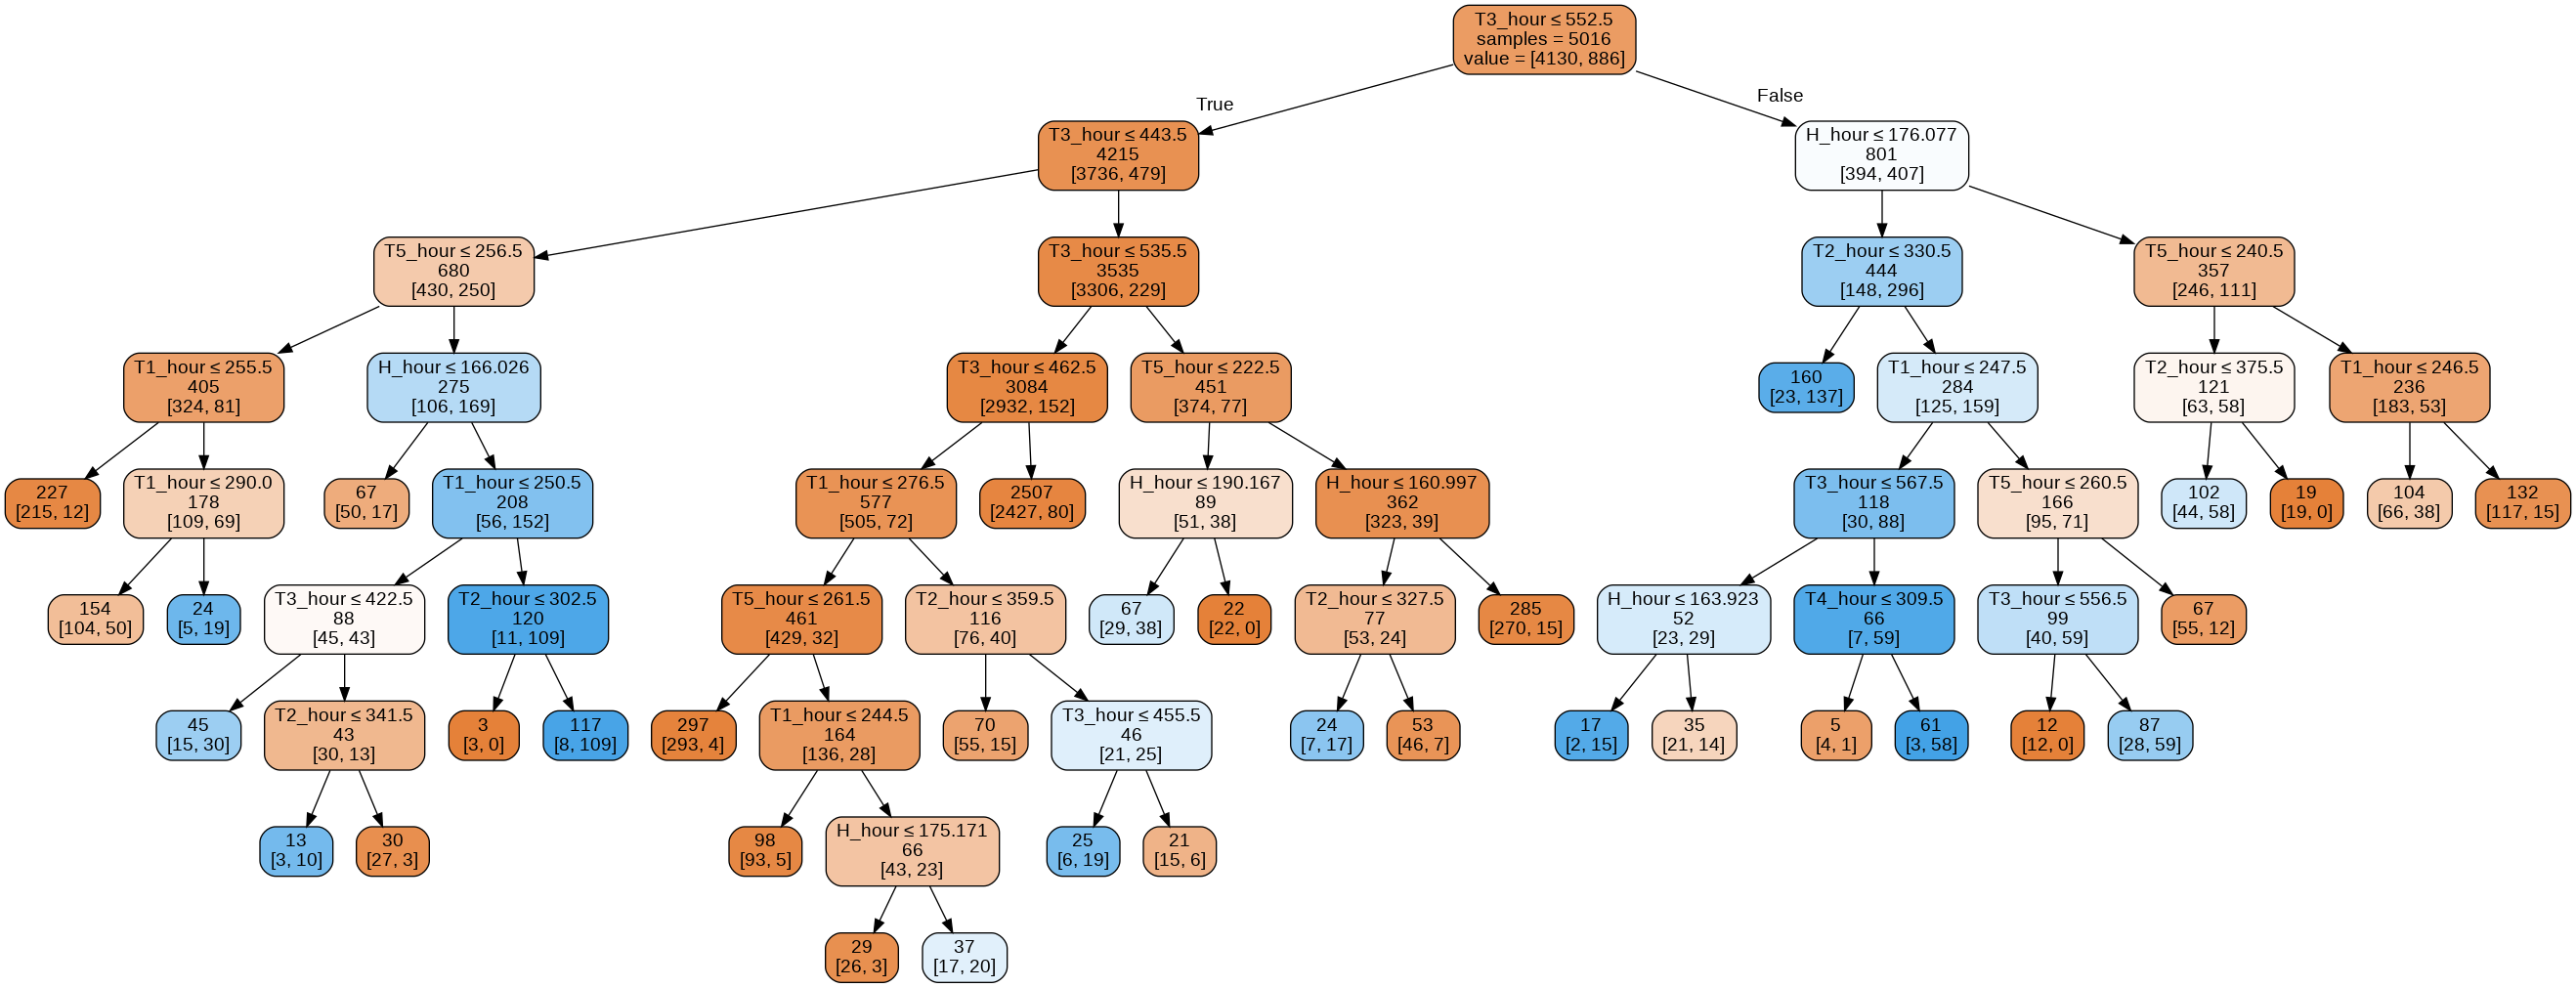

In [ ]:
smallClassTree= DecisionTreeClassifier(max_depth= 100, min_samples_split= 40, min_impurity_decrease= 0.001, random_state= 1)
smallClassTree.fit(training.drop(columns = ['quality_class']), training['quality_class'])
plotDecisionTree(smallClassTree, feature_names=training.columns[:7])

##3.4 Confusion Matrix for fine-tuned tree

In [ ]:
classificationSummary(training['quality_class'], smallClassTree.predict(training.drop(columns = ['quality_class'])))

Confusion Matrix (Accuracy 0.9029)

       Prediction
Actual    0    1
     0 3940  190
     1  297  589


In [ ]:
classificationSummary(test['quality_class'], smallClassTree.predict(test.drop(columns = ['quality_class'])))

Confusion Matrix (Accuracy 0.8540)

       Prediction
Actual    0    1
     0 2860  209
     1  327  276
